# TASK #1: PROJECT OVERVIEW

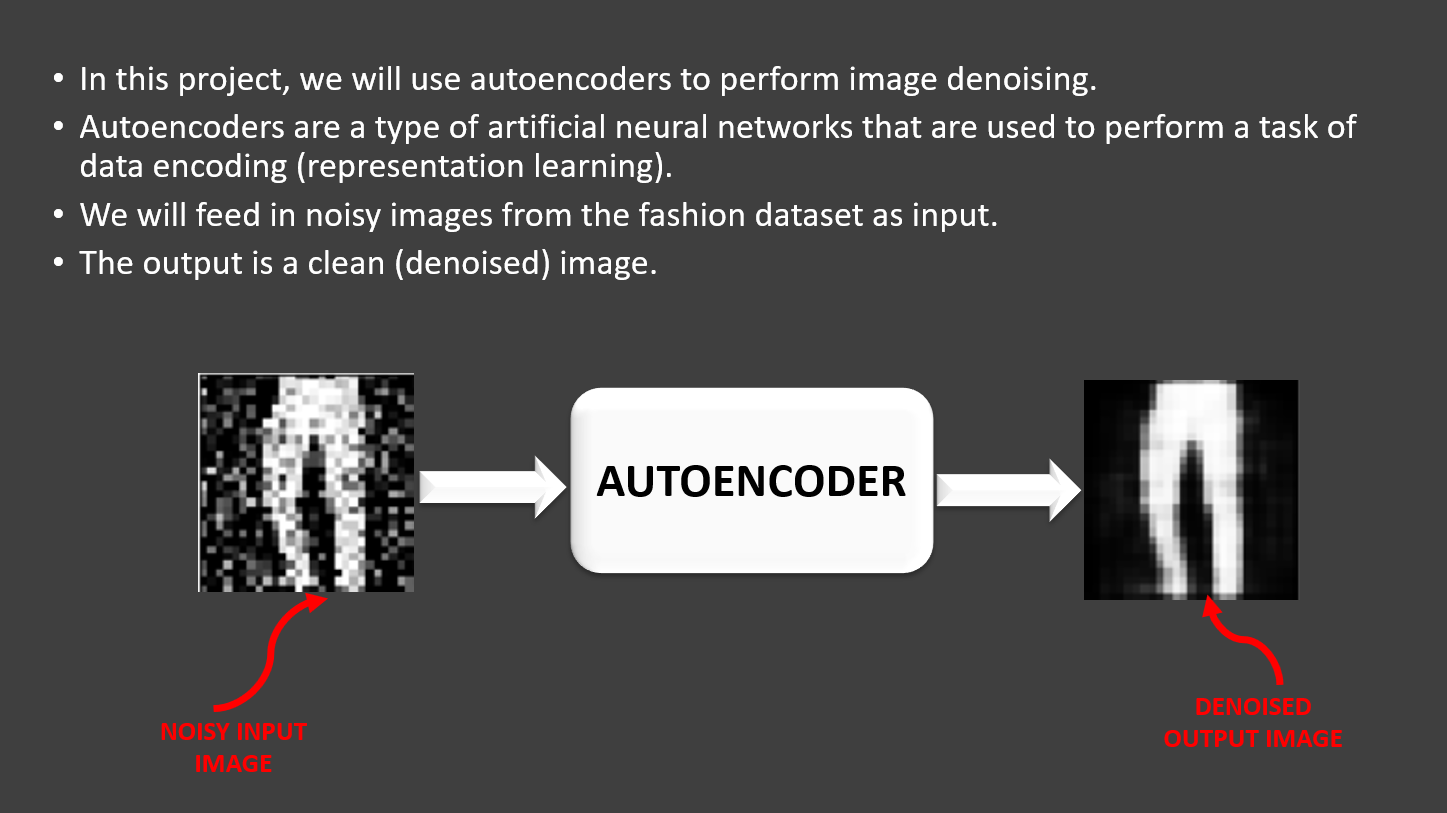

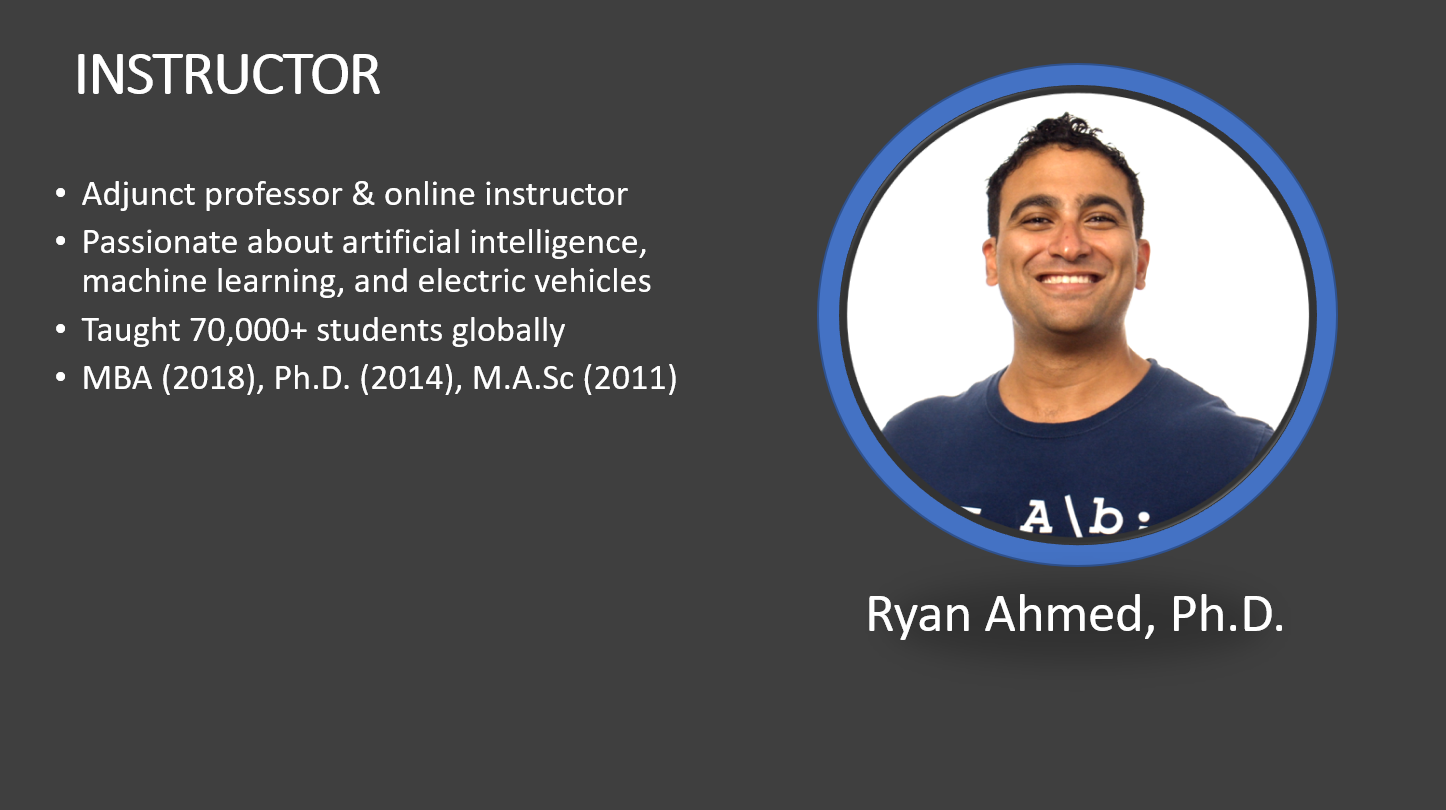

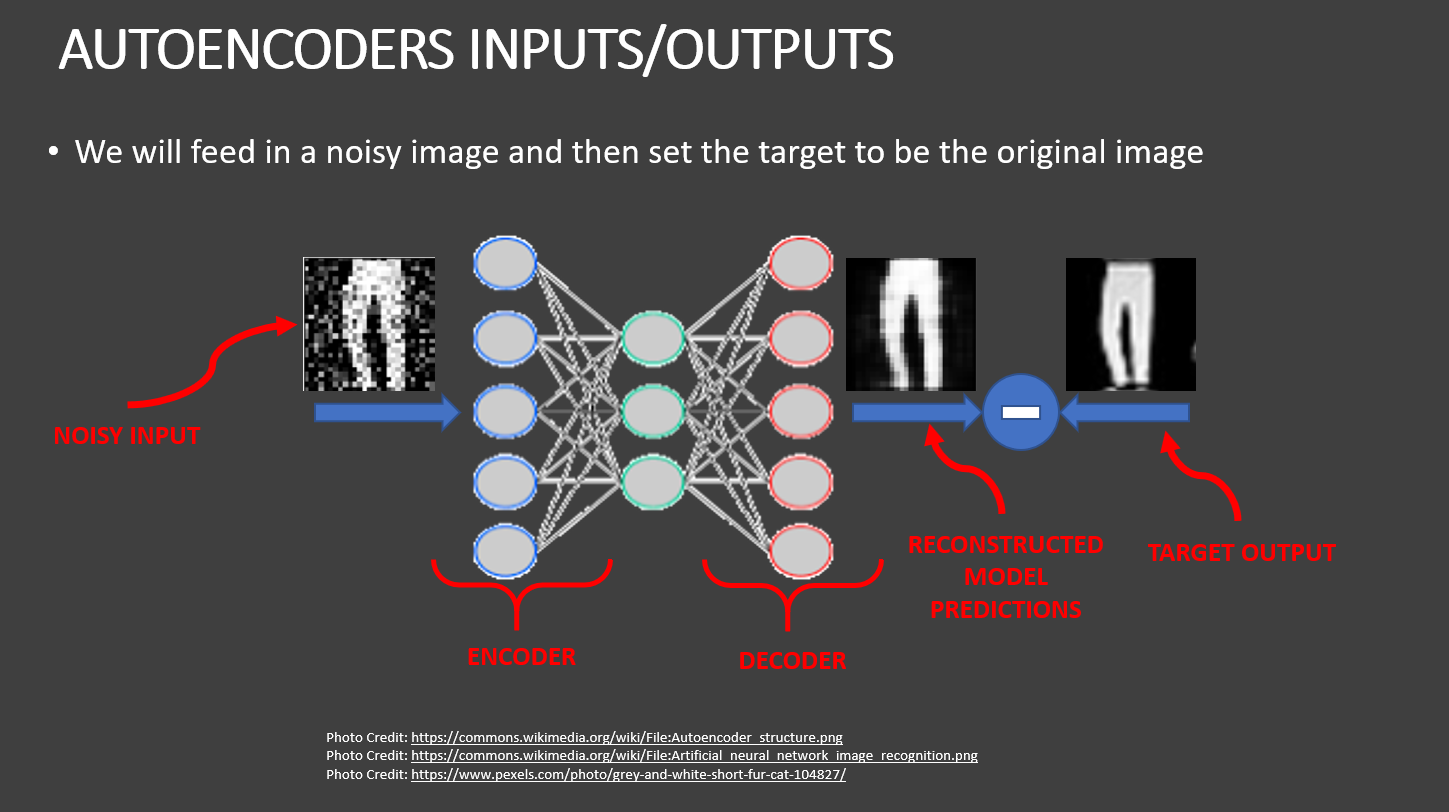

# TASK #2: IMPORT LIBRARIES AND DATASET

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
# Load dataset 
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

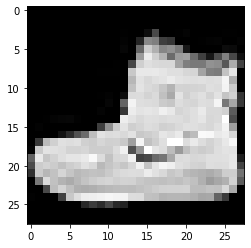

In [3]:
# Visualize a sample image
plt.imshow(x_train[0], cmap = "gray")

In [4]:
# check out the shape of the training data
x_train.shape

(60000, 28, 28)

In [5]:
# check out the shape of the testing data
x_test.shape

(10000, 28, 28)

# TASK #3: PERFORM DATA VISUALIZATION

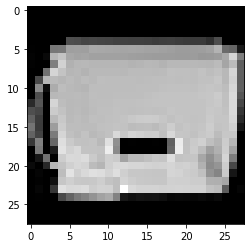

In [6]:
# Let's view some images!
i = random.randint(1, 60000)
plt.imshow(x_train[i], cmap = "gray")

In [7]:
label = y_train[i]
print(label)

8


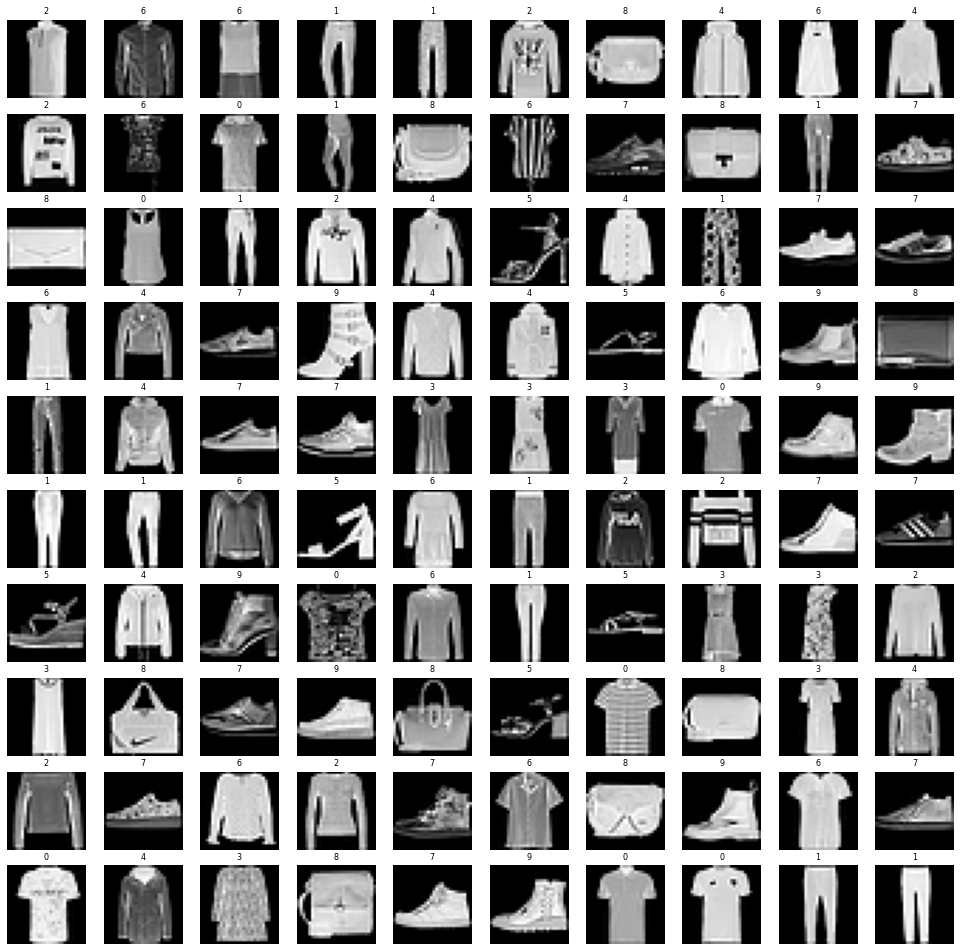

In [8]:
def showGrid(data, label):
    # Let's view more images in a grid format
    # Define the dimensions of the plot grid 
    W_grid = 10
    L_grid = 10

    # fig, axes = plt.subplots(L_grid, W_grid)
    # subplot return the figure object and axes object
    # we can use the axes object to plot specific figures at various locations

    fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

    axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

    n_training = len(data) # get the length of the training dataset

    # Select a random number from 0 to n_training
    for i in np.arange(0, W_grid * L_grid):
        index = np.random.randint(0, n_training)
        axes[i].imshow(data[index], cmap="gray")
        axes[i].set_title(label[index], fontsize = 8)
        axes[i].axis("off")

showGrid(x_train, y_train)

# TASK #4: PERFORM DATA PREPROCESSING

In [9]:
# normalize data
x_train = x_train.astype("float") / 255.
x_test = x_test.astype("float") / 255.

In [10]:
# add some noise
noise_factor = 0.3

noise_dataset = []
for img in x_train:
    noisy_image = img + np.random.randn(*img.shape) * noise_factor
    noisy_image = np.clip(noisy_image, 0, 1)
    noise_dataset.append(noisy_image)

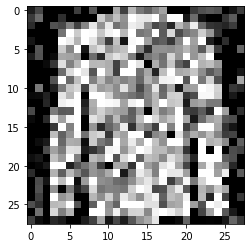

In [11]:
plt.imshow(noise_dataset[1597], cmap = "gray")

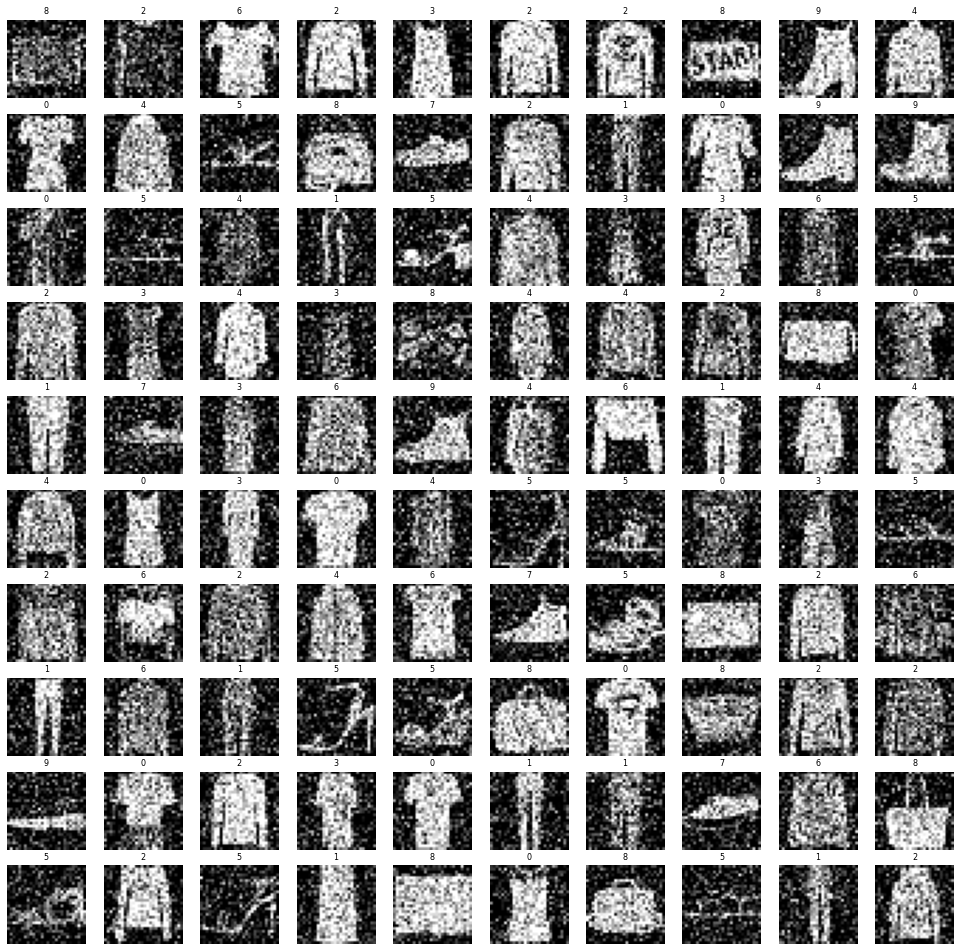

In [12]:
showGrid(noise_dataset, y_train)

In [13]:
# add noise to testing dataset
noise_factor = 0.4

noise_dataset_test = []
for img in x_test:
    noisy_image = img + np.random.randn(*img.shape) * noise_factor
    noisy_image = np.clip(noisy_image, 0, 1)
    noise_dataset_test.append(noisy_image)

# TASK #5: UNDERSTAND THE THEORY AND INTUITION BEHIND AUTOENCODERS

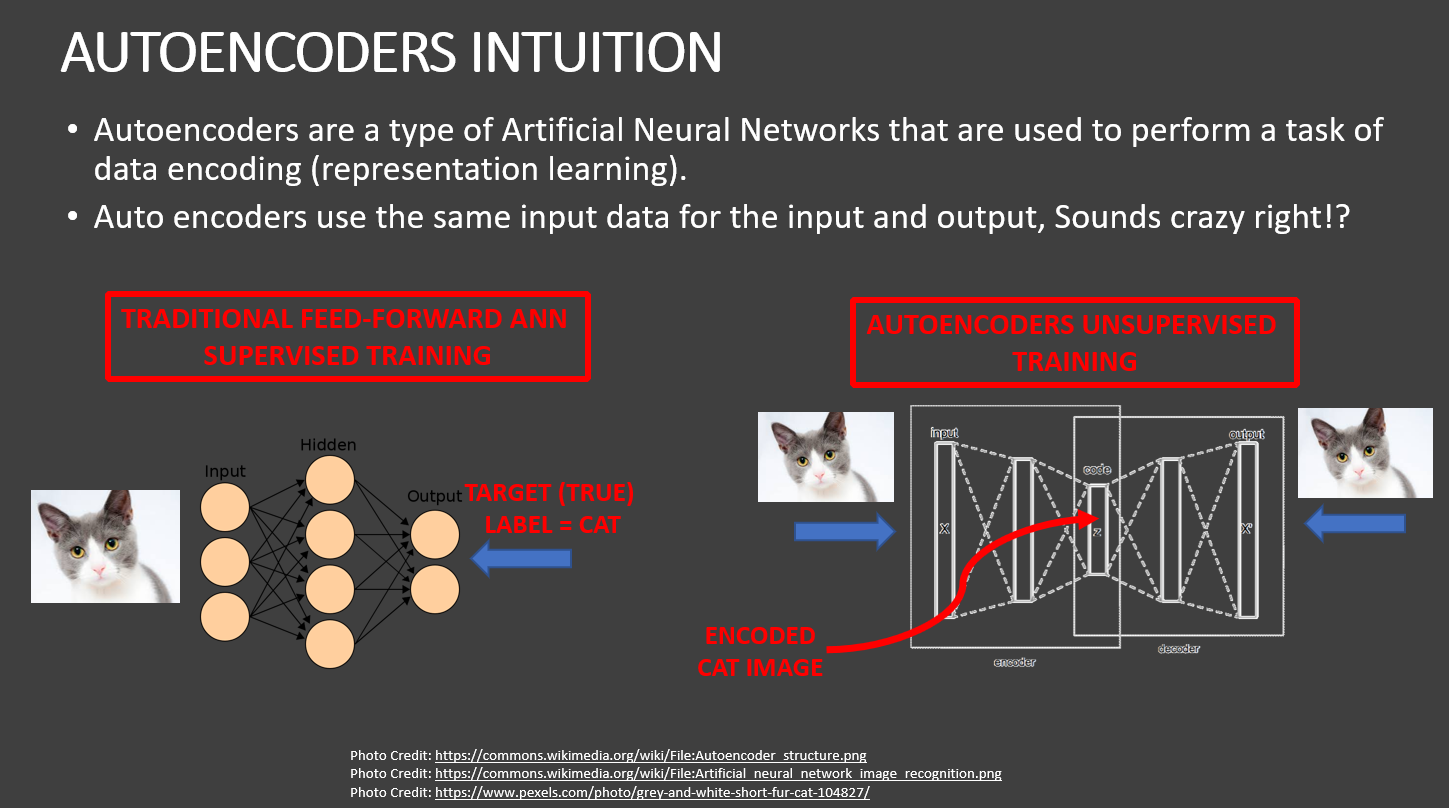

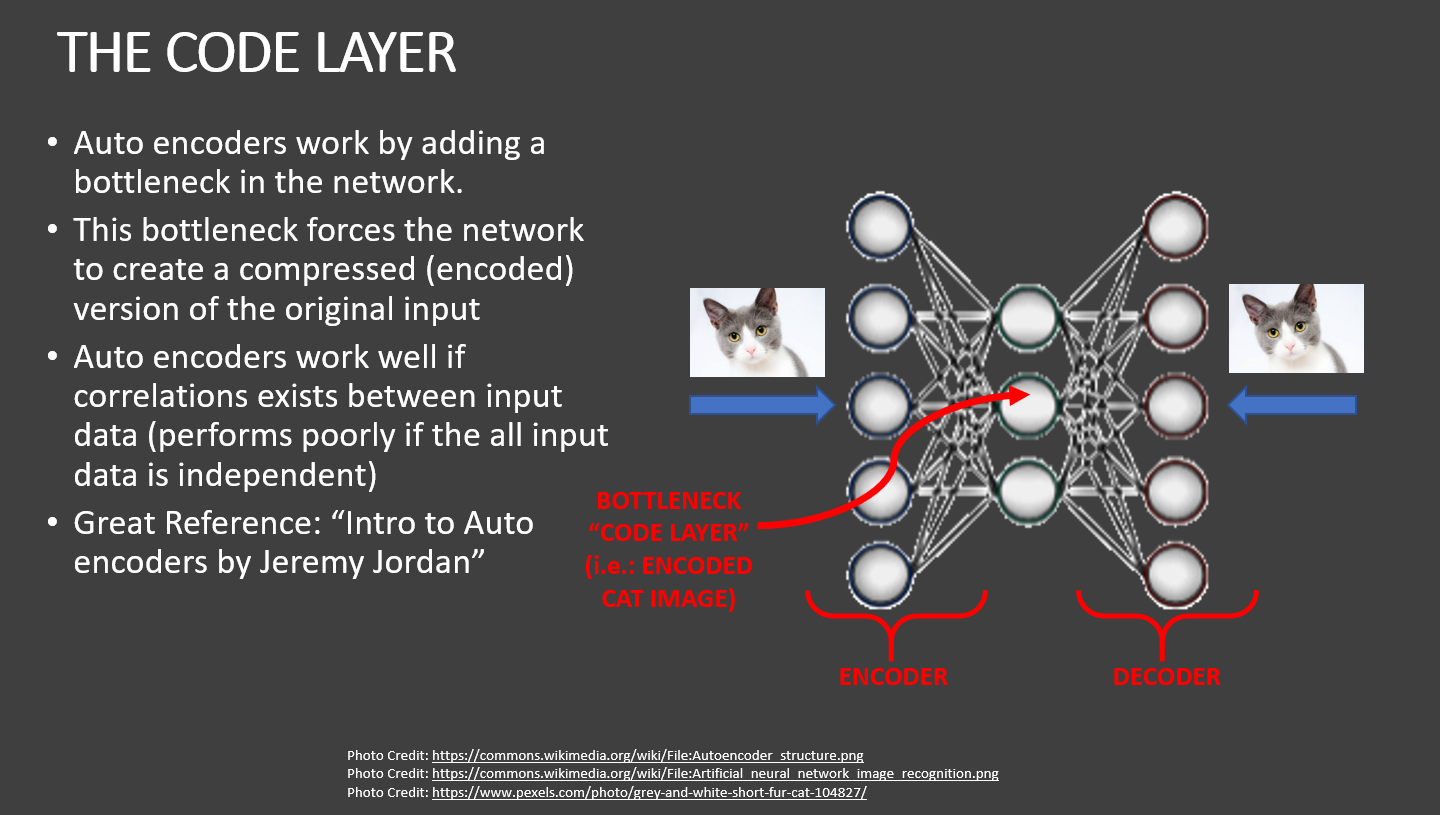

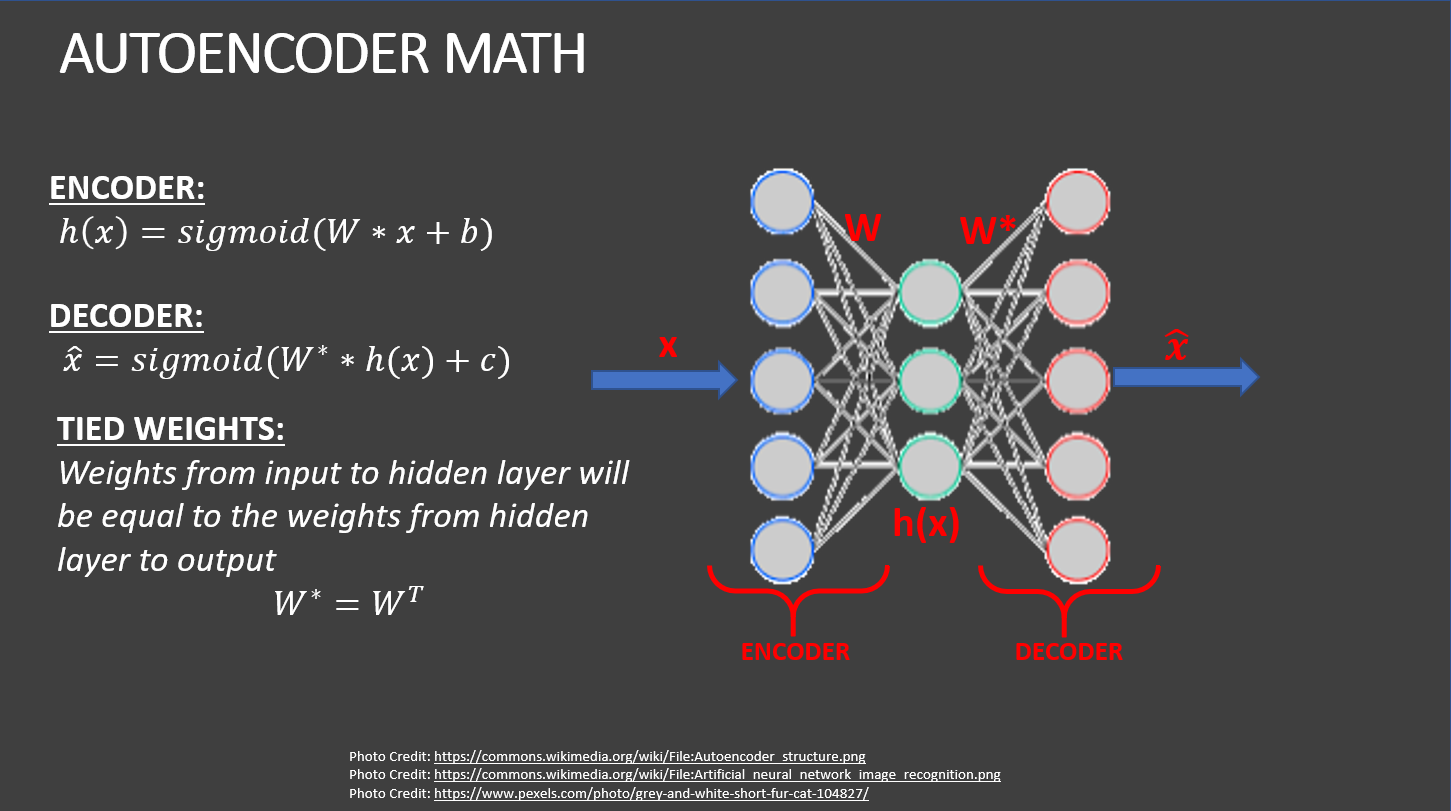

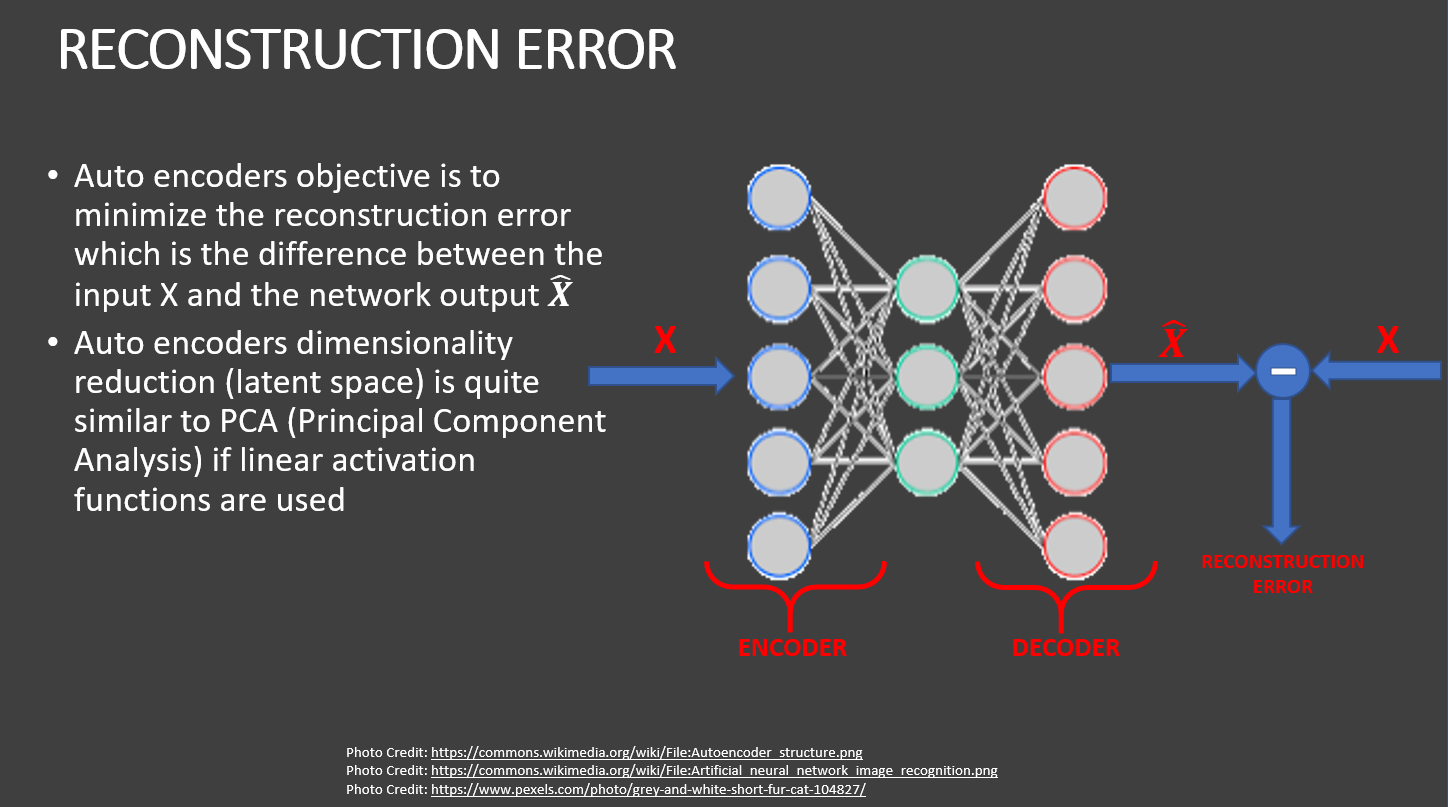

# TASK #6: BUILD AND TRAIN AUTOENCODER DEEP LEARNING MODEL

In [103]:
autoencoder = tf.keras.models.Sequential()

#encoder
autoencoder.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = 3, strides = 2, padding = "same", 
                                      input_shape = (28, 28, 1)))
autoencoder.add(tf.keras.layers.Conv2D(filters = 8, kernel_size = 3, strides = 2, padding = "same"))

autoencoder.add(tf.keras.layers.Conv2D(filters = 8, kernel_size = 3, strides = 1, padding = "same"))

#decoder
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 16, kernel_size = 3, strides = 2, padding = "same"))
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 4, kernel_size = 3, strides = 2, padding = "same"))
autoencoder.add(tf.keras.layers.Dense(1, activation = "sigmoid"))

In [104]:
autoencoder.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001))
autoencoder.summary()

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_145 (Conv2D)          (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_146 (Conv2D)          (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_147 (Conv2D)          (None, 7, 7, 8)           584       
_________________________________________________________________
conv2d_transpose_99 (Conv2DT (None, 14, 14, 16)        1168      
_________________________________________________________________
conv2d_transpose_100 (Conv2D (None, 28, 28, 4)         580       
_________________________________________________________________
dense_18 (Dense)             (None, 28, 28, 1)         5         
Total params: 3,657
Trainable params: 3,657
Non-trainable params: 0
___________________________________________________

In [105]:
autoencoder.fit(np.array(noise_dataset).reshape(-1, 28, 28, 1),
               x_train.reshape(-1, 28, 28, 1),
               epochs = 20,
               batch_size = 64,
               validation_data = (np.array(noise_dataset_test).reshape(-1, 28, 28, 1), x_test.reshape(-1, 28, 28, 1)))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 44s 736us/sample - loss: 0.3362 - val_loss: 0.3225
Epoch 2/20
60000/60000 [==============================] - 44s 735us/sample - loss: 0.3046 - val_loss: 0.3179
Epoch 3/20
60000/60000 [==============================] - 45s 745us/sample - loss: 0.3017 - val_loss: 0.3178
Epoch 4/20
60000/60000 [==============================] - 44s 741us/sample - loss: 0.3007 - val_loss: 0.3171
Epoch 5/20
60000/60000 [==============================] - 45s 755us/sample - loss: 0.3001 - val_loss: 0.3170
Epoch 6/20
60000/60000 [==============================] - 45s 743us/sample - loss: 0.2996 - val_loss: 0.3161
Epoch 7/20
60000/60000 [==============================] - 45s 752us/sample - loss: 0.2992 - val_loss: 0.3151
Epoch 8/20
60000/60000 [==============================] - 46s 771us/sample - loss: 0.2990 - val_loss: 0.3154
Epoch 9/20
60000/60000 [==============================] - 46s 765us/sample - l

# TASK #7: EVALUATE TRAINED MODEL PERFORMANCE

In [26]:
evaluation = autoencoder.evaluate(np.array(noise_dataset_test).reshape(-1, 28, 28, 1), x_test.reshape(-1, 28, 28, 1))
print("Test Accuracy: {:.4f}".format(evaluation))

10000/10000 [==============================] - 3s 335us/sample - loss: 0.3165
Test Accuracy: 0.3165


In [28]:
predicted = autoencoder.predict(np.array(noise_dataset_test)[:10].reshape(-1, 28, 28, 1))

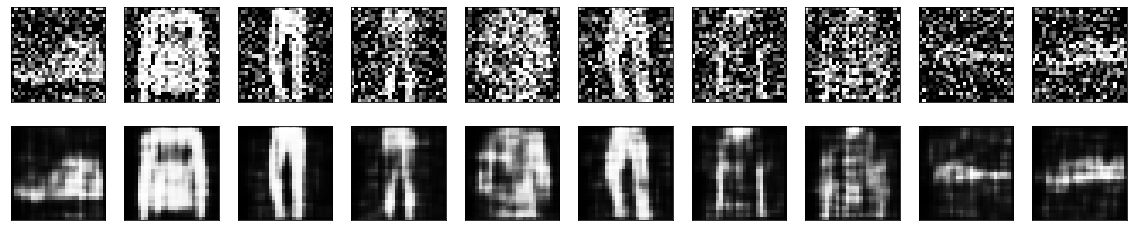

In [30]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([noise_dataset_test[:10], predicted], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

# EXCELLENT WORK!

- 0 = T-shirt/top
- 1 = Trouser
- 2 = Pullover
- 3 = Dress
- 4 = Coat
- 5 = Sandal
- 6 = Shirt
- 7 = Sneaker
- 8 = Bag
- 9 = Ankle boot